# K-Means Cluster Analysis of Personal IMDB Ratings

### Idea/TO DO 
1. Could do predictive modelling to predict Your Ratings.

### Scaling Data and Principal Component Analysis.
1. Scale Data. (Done, converted all possible values to numeric, Dropped Title, REstore from Original DF)
2. Perform PCA (87 Components explain 50% of theVariance in the Dataset) - Down from 207 Features.
3. Cluster (Doing)
4. Analzse Clusters.(Doing)
5. Visualise Clusters.
5. Profit.

In [468]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns
sys.path.append("../tools/")

pd.set_option('display.max_rows', 1000)

In [414]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [415]:
path = '/Users/apple/Desktop/DS/Datasets/imdb_ratings.csv'

import os
from pathlib import Path

In [416]:
print(Path.cwd())
print(Path.home())

/Users/apple/Desktop/DS/My_imdb_analysis_pd_plt_sns[EDA]
/Users/apple


In [417]:
data = pd.read_csv(path, engine='python', index_col=0)

In [418]:
data.describe(include='all')

Your Rating  Date Rated                    Title  \
count    301.000000         301                      301   
unique          NaN         126                      301   
top             NaN  2016-04-27  Shaadi Mein Zaroor Aana   
freq            NaN          32                        1   
mean       7.996678         NaN                      NaN   
std        0.939852         NaN                      NaN   
min        5.000000         NaN                      NaN   
25%        8.000000         NaN                      NaN   
50%        8.000000         NaN                      NaN   
75%        9.000000         NaN                      NaN   
max       10.000000         NaN                      NaN   

                                          URL Title Type  IMDb Rating  \
count                                     301        301   301.000000   
unique                                    301          6          NaN   
top     https://www.imdb.com/title/tt1734110/      movie          NaN   
freq                                        1        250          NaN   
mean                                      NaN        NaN     7.882060   
std                                       NaN        NaN     0.696235   
min                                       NaN        NaN     5.600000   
25%                                       NaN        NaN     7.500000   
50%                                       NaN        NaN     7.900000   
75%                                       NaN        NaN     8.300000   
max                                       NaN        NaN     9.900000   

        Runtime (mins)         Year         Genres     Num Votes Release Date  \
count       301.000000   301.000000            301  3.010000e+02          300   
unique             NaN          NaN            145           NaN          290   
top                NaN          NaN  Comedy, Drama           NaN   2012-09-08   
freq               NaN          NaN             26           NaN            2   
mean        116.229236  2008.328904            NaN  2.971019e+05          NaN   
std          61.651688    12.819313            NaN  3.445646e+05          NaN   
min           6.000000  1931.000000            NaN  3.300000e+01          NaN   
25%          98.000000  2007.000000            NaN  4.267900e+04          NaN   
50%         115.000000  2013.000000            NaN  1.852270e+05          NaN   
75%         132.000000  2016.000000            NaN  4.329790e+05          NaN   
max         594.000000  2018.000000            NaN  2.039088e+06          NaN   

                Directors  
count                 258  
unique                203  
top     Christopher Nolan  
freq                    6  
mean                  NaN  
std                   NaN  
min                   NaN  
25%                   NaN  
50%                   NaN  
75%                   NaN  
max                   NaN

#### Lets first filter only movies 

In [419]:
# create filter 

film_filt = (data['Title Type'] == 'movie')

# getting film data using loc indexer 
# syntax .loc[condition in form of df['']== , list of columns you want displayed]

data_film = data.loc[(film_filt)]

In [420]:
# Keeping Backup
film_filt = (data['Title Type'] == 'movie')

# getting film data using loc indexer 
# syntax .loc[condition in form of df['']== , list of columns you want displayed]

data_film_orig = data.loc[(film_filt)]

In [421]:
# 250 Movies 
data_film.describe()

Your Rating  IMDb Rating  Runtime (mins)         Year     Num Votes
count   250.000000   250.000000      250.000000   250.000000  2.500000e+02
mean      7.896000     7.712400      122.052000  2007.660000  3.210570e+05
std       0.912422     0.588619       26.250135    13.661734  3.532972e+05
min       5.000000     5.600000       60.000000  1931.000000  3.300000e+01
25%       7.000000     7.400000      105.000000  2006.000000  4.887300e+04
50%       8.000000     7.800000      118.000000  2012.000000  2.224305e+05
75%       8.000000     8.100000      135.000000  2016.000000  4.596830e+05
max      10.000000     9.300000      321.000000  2018.000000  2.039088e+06

In [422]:
data_film[['Genre1','Genre2','Genre3','Genre4','Genre5','Genre6','Genre7']] = data_film.Genres.str.split(',', expand=True)
data_film.drop(['Genre2','Genre3', 'Genre4','Genre5','Genre6','Genre7'], axis= 1, inplace = True)
# Loss of info by dropping secondary, tertiary genres but will result in duplication, is complex.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [423]:
# Loss of info, Lee ukreich, ethan and joel coen etc are big loosers. Complex fix later.
data_film[['Director1','Director2','Director3', 'Director4']] = data_film.Directors.str.split(',', expand=True)
data_film.drop(['Director2','Director3', 'Director4'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [424]:
data_film.drop(['Genres', 'Directors'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


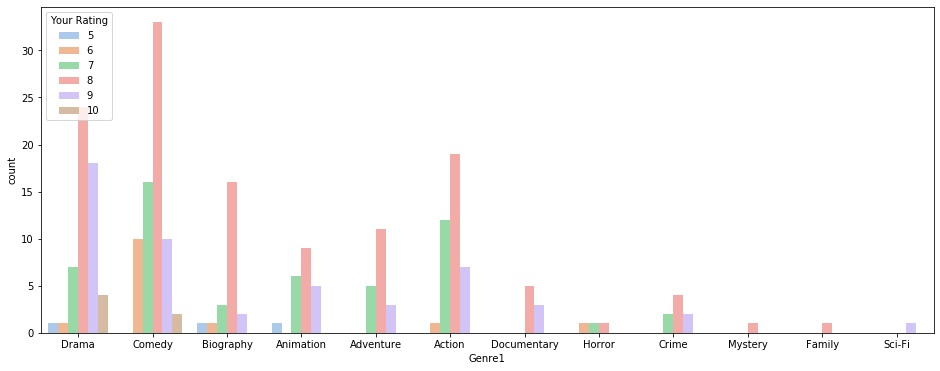

In [425]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'Genre1', data = data_film, hue="Your Rating", palette="pastel")

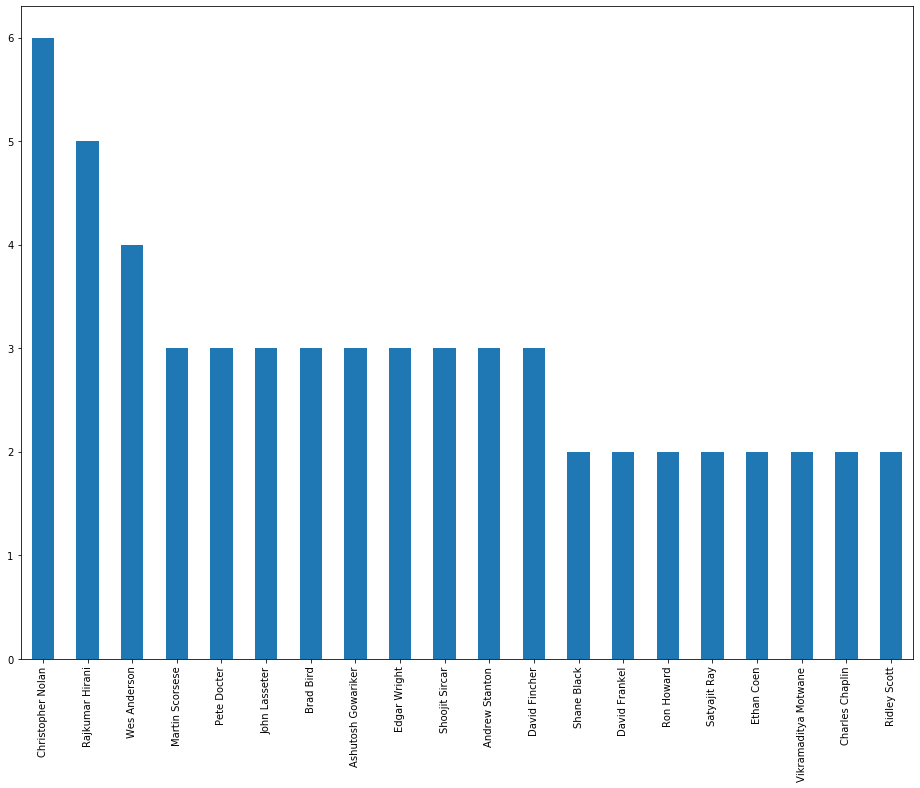

In [192]:
plt.figure(figsize = (16,12))
data_film.Director1.value_counts()[:20].plot(kind = 'bar')

### One - Hot encode Genre1

In [193]:
data_film = pd.get_dummies(data_film, prefix='Genre:', columns=['Genre1'])

In [194]:
data_film = pd.get_dummies(data_film, prefix='Director:', columns=['Director1'])

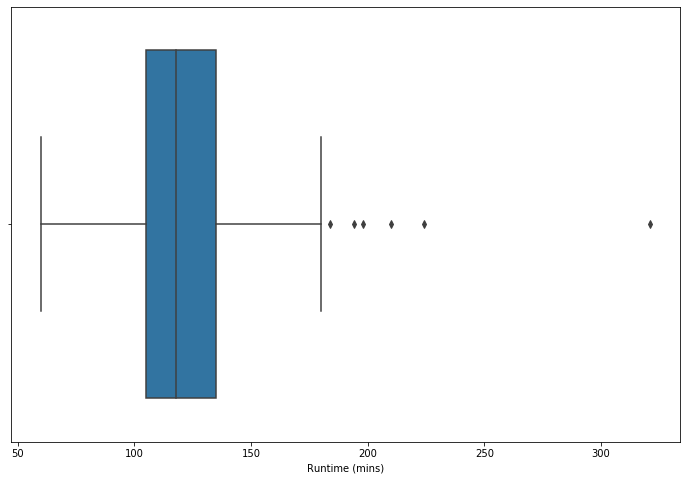

In [195]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Runtime (mins)', data = data_film)

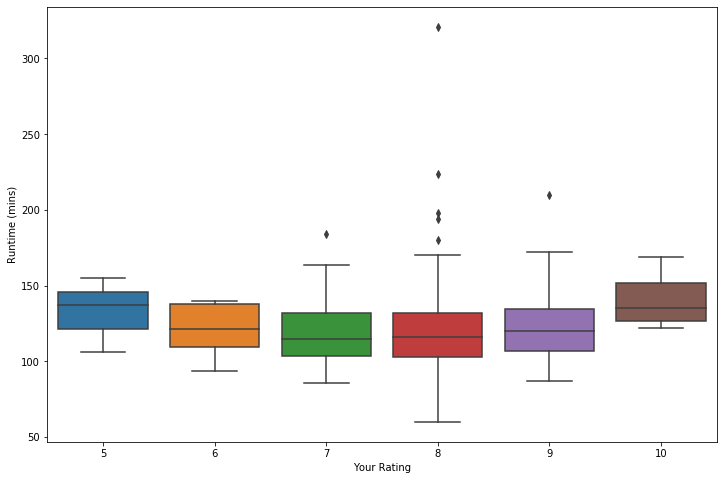

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Your Rating', y = 'Runtime (mins)', data = data_film)

#### Lets check if there is a linear relationship between my rating and runtime

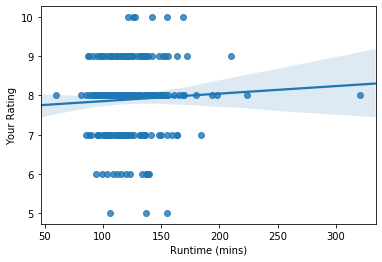

In [16]:
sns.regplot(y = 'Your Rating', x = 'Runtime (mins)', data = data_film)
# No SIgnificant Relationship

#### Lets check if there is a linear relationship between my rating and IMDB rating

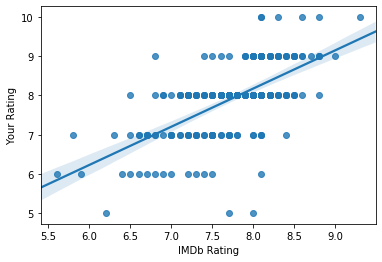

In [17]:
sns.regplot(y = 'Your Rating', x = 'IMDb Rating', data = data_film)
# Very strong Positive relationship. Not a hipster after all.

#### Lets check if there is a linear relationship between my rating and Year of films release.

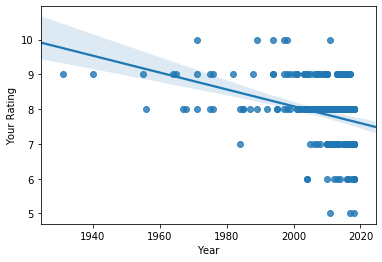

In [18]:
sns.regplot(y = 'Your Rating', x = 'Year', data = data_film)

#### Insight: I tend to rate older movies highly and newer movies worse.

#### Lets check if there is a linear relationship between my rating and The number of votes/Popularity.

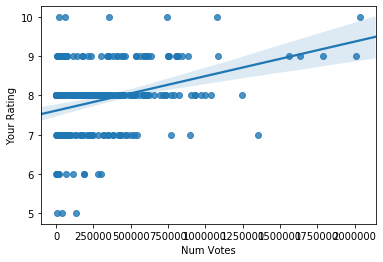

In [19]:
sns.regplot(y = 'Your Rating', x = 'Num Votes', data = data_film)

#### Insight: Popular movies tend to get rated higher, decent positive trend.

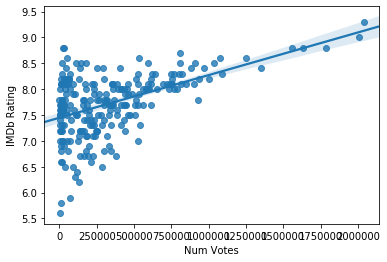

In [20]:
sns.regplot(y = 'IMDb Rating', x = 'Num Votes', data = data_film)

#### Getting Data for Clustering, Need a feature vector (starting with two simple Feature)
#### 1. Clustering Based on runtime and runtime. Lets see If I give tend to give a certain rating to movies of a certain length.

#### Comparing BoxPlots

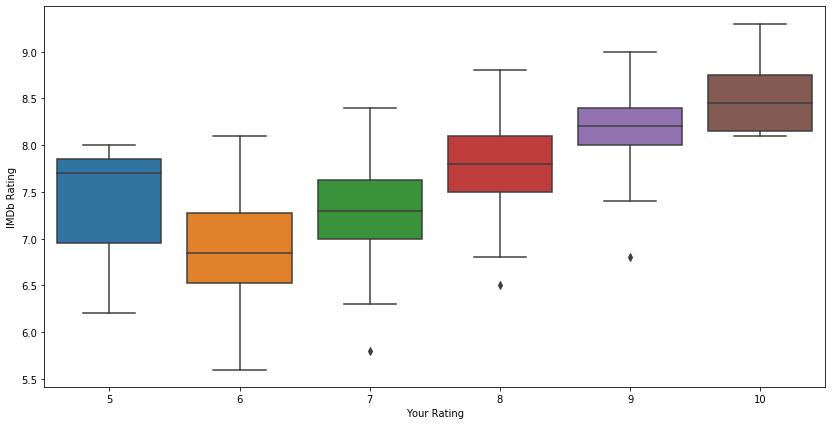

In [151]:
plt.figure(figsize=(14,7))
sns.boxplot(x = 'Your Rating', y = 'IMDb Rating', data = data_film)
#sns.boxplot(x = 'IMDb Rating', data = data_film, color = 'gray')

#### Insight: I generally follow the same tresnds as the IMDb ratings. The movies I've rated the highest tend to be highly rated movies in general. There is a large percentage of movies I've rated lower that the IMDb public likes.

#### Lets just plot the features and try and find clusters.

Text(0, 0.5, 'Rating')

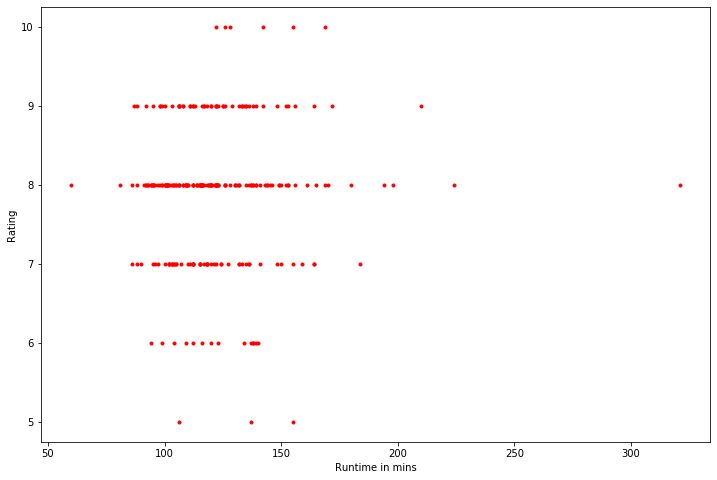

In [22]:
plt.figure(figsize=(12,8))
plt.plot( data_film['Runtime (mins)'], data_film['Your Rating'].to_list(), 'r.')
plt.xlabel('Runtime in mins')
plt.ylabel('Rating')

In [426]:
#data_film.dtypes

In [ ]:
# Dropping Rated and Release month and day, could have information, like I like rating movies higher on weekends etc?

In [197]:
data_film[['Rated_Year', 'Rated_month', 'Rated_Day']] = data_film['Date Rated'].str.split('-', expand = True)
data_film.drop(['Rated_month', 'Rated_Day'], axis = 1, inplace = True)

In [198]:
#data_film.rename({'Year': 'Rated_Year'}, axis=1, inplace=True)
data_film.drop('Date Rated', axis = 1, inplace = True)

In [200]:
data_film[['Release_Year', 'Release_month', 'Release_Day']] = data_film['Release Date'].str.split('-', expand = True)
data_film.drop(['Release_month', 'Release_Day'], axis = 1, inplace = True)

In [203]:
data_film.drop('Release Date', axis = 1, inplace = True)

In [207]:
data_film.drop(['Title Type', 'URL'], axis = 1, inplace = True)

### Making Copy as we'll drop Title and convert to numeric

In [208]:
data_film_num = data_film

In [209]:
data_film_num.drop(['Title'], axis = 1, inplace=True)

In [220]:
data_film_num.drop(['Release_Year'], axis = 1, inplace=True)

In [222]:
data_film_num['Rated_Year'] = data_film_num['Rated_Year'].astype(int)

#### Checking Out this New Info

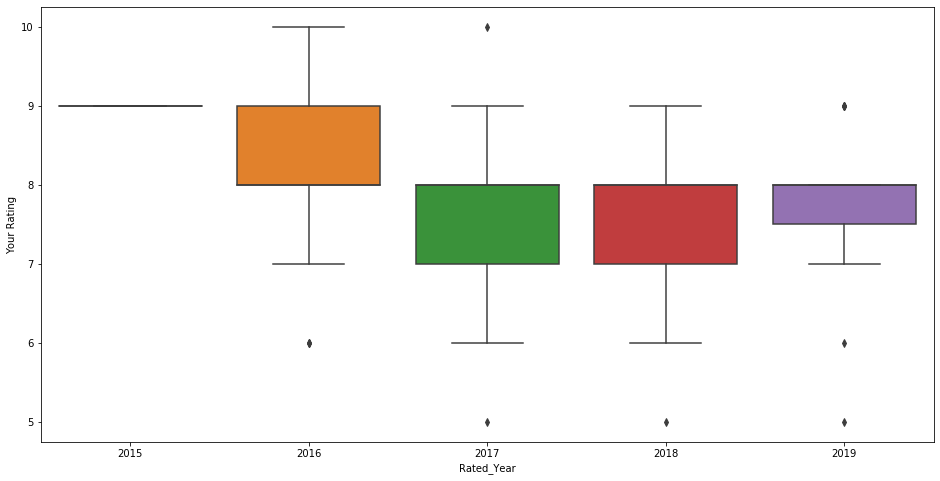

In [228]:
plt.figure(figsize=(16,8))
sns.boxplot(x = 'Rated_Year', y = 'Your Rating', data =data_film_num )

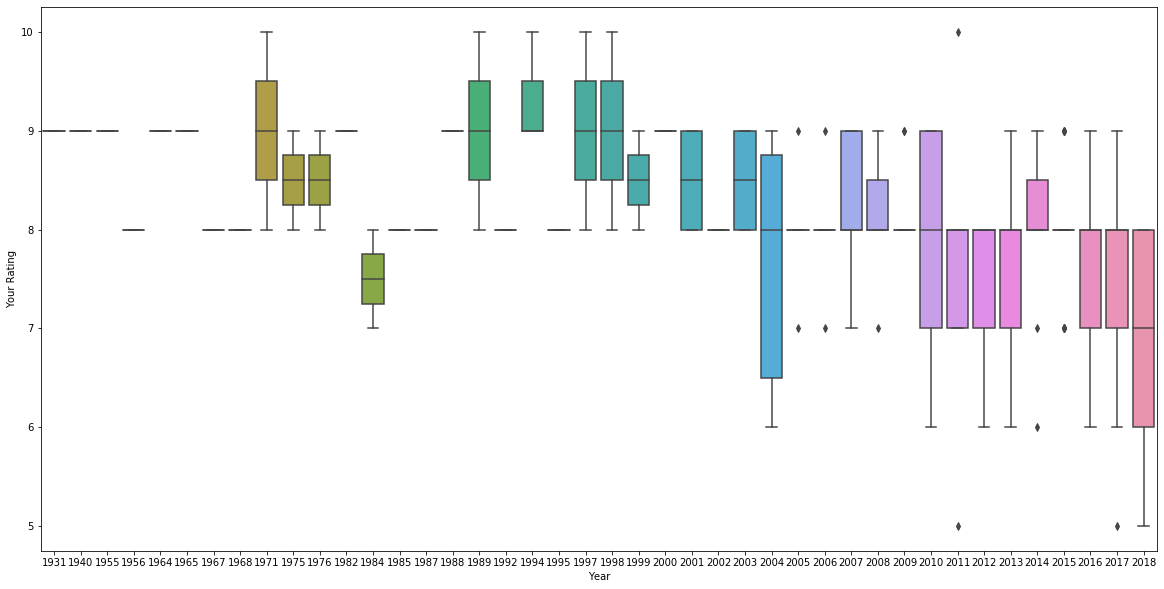

In [233]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Year', y = 'Your Rating', data =data_film_num )

### Lets standardise these Values

In [152]:
from sklearn.preprocessing import StandardScaler

In [234]:
data_film_scaled = StandardScaler().fit_transform(data_film_num.values)

### Restoring Indexes And Column Names

In [238]:
data_film_scaled_df = pd.DataFrame(data = data_film_scaled, index = data_film_num.index, columns = data_film_num.columns)

# Principal Components Analysis to Reduce Dimensionality of Data

#### Lets Target that 50% Percent of the Variance is explained by the principal components

In [259]:
from sklearn.decomposition import PCA

target_variance = 0.50

for i in range(len(data_film_scaled_df.columns)):
    pca_film = PCA(n_components=i)
    pca_components_film = pca_film.fit_transform(data_film_scaled_df)
    #print(f'Total Explained Variance is {np.sum(pca_film.explained_variance_ratio_)}')
    if np.sum(pca_film.explained_variance_ratio_) > target_variance:
        #print(f'No of Components that explain 50% of Variance: {i}')
        break

print(f'No of Components that explain 50% of Variance: {i}')

No of Components that explain 50% of Variance: 87


In [427]:
pca_components_film.shape

(250, 87)

In [466]:
first_comp = pca_film.components_[0]
# Creating Dataframe for correspoding Columns in original Dataframe
first_comps = pd.DataFrame(zip(first_comp, data_film_scaled_df.columns), columns = ['Weights', 'Features'])
first_comps['abs_weights']=first_comps['Weights'].apply(lambda x: np.abs(x))

In [467]:
first_comps.sort_values('abs_weights', ascending=False)

Weights                             Features  abs_weights
1    0.446971                          IMDb Rating     0.446971
0    0.415577                          Your Rating     0.415577
4    0.356365                            Num Votes     0.356365
3   -0.258743                                 Year     0.258743
9   -0.241291                        Genre:_Comedy     0.241291
12   0.191956                         Genre:_Drama     0.191956
2    0.168388                       Runtime (mins)     0.168388
206 -0.148758                           Rated_Year     0.148758
47   0.141692          Director:_Christopher Nolan     0.141692
69   0.127220             Director:_Frank Darabont     0.127220
42  -0.098480               Director:_Caleb Vetter     0.098480
169  0.097972            Director:_Robert Zemeckis     0.097972
191  0.087407           Director:_Steven Spielberg     0.087407
22  -0.079530              Director:_Adam Shankman     0.079530
134  0.077587               Director:_Milos Forman     0.077587
79   0.074653       Director:_Hrishikesh Mukherjee     0.074653
95  -0.074345            Director:_Jim Field Smith     0.074345
76   0.071541               Director:_Gus Van Sant     0.071541
177  0.071012               Director:_Satyajit Ray     0.071012
54   0.067855              Director:_David Fincher     0.067855
137 -0.066511            Director:_Mrighdeep Lamba     0.066511
192 -0.064667             Director:_Subhash Kapoor     0.064667
124 -0.064609              Director:_Marc Lawrence     0.064609
67  -0.064445              Director:_Evan Goldberg     0.064445
45   0.063235            Director:_Charles Chaplin     0.063235
150 -0.063027                Director:_Peter Segal     0.063027
123 -0.062972                 Director:_Luv Ranjan     0.062972
122 -0.062342            Director:_Luke Greenfield     0.062342
165  0.061505               Director:_Ridley Scott     0.061505
184 -0.060861         Director:_Siddharth Malhotra     0.060861
102 -0.060439                 Director:_Jon M. Chu     0.060439
20  -0.058210            Director:_Abhishek Sharma     0.058210
16   0.057809                        Genre:_Sci-Fi     0.057809
64  -0.057288               Director:_Edward Zwick     0.057288
5    0.055470                        Genre:_Action     0.055470
106 -0.055319       Director:_Joseph Gordon-Levitt     0.055319
131  0.054228              Director:_Michel Gondry     0.054228
55  -0.053332              Director:_David Frankel     0.053332
189  0.053284            Director:_Stanley Kubrick     0.053284
14  -0.052679                        Genre:_Horror     0.052679
172  0.052101                 Director:_Ron Howard     0.052101
108 -0.051750                Director:_Karan Johar     0.051750
200 -0.051100               Director:_Umesh Shukla     0.051100
88  -0.050930                  Director:_James Wan     0.050930
168  0.050015                Director:_Robert Wise     0.050015
164 -0.049596              Director:_Rick Famuyiwa     0.049596
117 -0.049078            Director:_Leslye Headland     0.049078
18  -0.048847                Director:_Abhinay Deo     0.048847
126  0.046822            Director:_Martin Scorsese     0.046822
194 -0.045873                 Director:_Tim Burton     0.045873
110 -0.045723         Director:_Kelly Fremon Craig     0.045723
83   0.045578              Director:_James Cameron     0.045578
152  0.045493          Director:_Quentin Tarantino     0.045493
41  -0.044856                  Director:_Brian Fee     0.044856
32   0.044287             Director:_Anurag Kashyap     0.044287
74  -0.043816              Director:_Greg Berlanti     0.043816
65  -0.043764  Director:_Elizabeth Allen Rosenbaum     0.043764
151  0.042896                 Director:_Peter Weir     0.042896
98   0.042634           Director:_John G. Avildsen     0.042634
37   0.042517             Director:_Barry Levinson     0.042517
158 -0.042073               Director:_Ratnaa Sinha     0.042073
89  -0.041784                Director:

### Getting the features for the clustering (using Runtime and My Ratings)
Coverting DF to dict, and using the given helper function.

In [263]:
film_dict = data_film.to_dict()

In [312]:
#film_dict.keys()

In [265]:
feature_1 = 'Runtime (mins)'
feature_2 = 'Your Rating'
feature_3 = 'Year'
feature_4 = 'IMDb Rating'
feature_5 = 'Num Votes'
# poi is supposed to be target for helper, here dummy column

poi = 'Const'

# Ge list 2D array of rows with the features - [[feature_1, feature_2]]

In [266]:
# Adding all film runtimes to list, sure there is a better way.
run_time = []
for i in film_dict[feature_1]:
    run_time.append(film_dict[feature_1][i])

In [267]:
# Adding all your ratings to list, sure there is a better way.

y_rating = []
for i in film_dict[feature_2]:
    y_rating.append(film_dict[feature_2][i])

In [268]:
# year to list 

year = []
for i in film_dict[feature_3]:
    year.append(film_dict[feature_3][i])

In [269]:
# IMDb Rating to list 

imdb_rate = []
for i in film_dict[feature_4]:
    imdb_rate.append(film_dict[feature_4][i])

In [270]:
# Num of votes to list 

num_votes = []

for i in film_dict[feature_5]:
    num_votes.append(film_dict[feature_5][i])

In [271]:
# Convert to numpy arrays and vstack or concatenate.

run_arr = np.array(run_time)
rat_arr = np.array(y_rating)
year_arr = np.array(year)
imdb_rat_arr = np.array(imdb_rate)
num_votes_arr = np.array(num_votes)

In [272]:
run_arr = run_arr.reshape(-1,1)
rat_arr = rat_arr.reshape(-1,1)
year_arr = year_arr.reshape(-1,1)
imdb_rat_arr = imdb_rat_arr.reshape(-1,1)
num_votes_arr = num_votes_arr.reshape(-1,1)

In [273]:
# hstack to get rows with arrays of [feat 1, feat 2].
movie_features = np.hstack((run_arr, rat_arr, year_arr, imdb_rat_arr, num_votes_arr))

# convert to list of arrays for compatibility with helper function
movie_features_list = list(movie_features)

In [278]:
movie_features_list[0].shape

(5,)

In [282]:
list_pca_film = list(pca_components_film)

# Fitting Kmeans - Clustering algo.
1. Scale features first. (Already Done)

## Difficult to Interpret with Runtime and YourRating.
# TO DO:
1. Visualize these clusters based on some features.
2. SSE Score for K-Means Clustering

In [150]:
#data_film.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, tt1010048 to tt0993846
Columns: 211 entries, Your Rating to Director:_Zoya Akhtar
dtypes: float64(1), int64(4), object(5), uint8(201)
memory usage: 80.6+ KB


In [285]:
# Already Scaled using Standard Scaler

#from sklearn.preprocessing import MinMaxScaler

# Transforming to scaled features
#scaled_mov_features = MinMaxScaler().fit_transform(movie_features_list)

### Finding Optimal Number of Clusters
Somewhat of an Elbow at 50 Clusters (still too many Lmao)

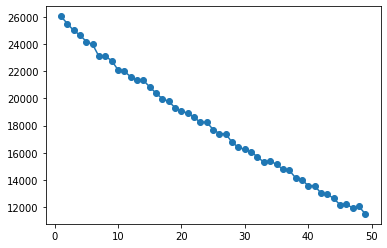

In [303]:
# calculate distortion for a range of number of cluster
from sklearn.cluster import KMeans


distortions = []

for i in range(1,50):
    cluster_film = KMeans(n_clusters = i, n_init=10, max_iter= 100).fit(list_pca_film)
    distortions.append(cluster_film.inertia_)
    pred_film = cluster_film.labels_

plt.plot(range(1, 50), distortions, marker='o')

In [286]:
#plt.figure(figsize=(18,12))

#try:
#    Draw(pred_film, movie_features_list, poi, mark_poi=False, name="Filmclusters_rating_year_runtime_imdb_numVotes.pdf", f1_name=feature_1, f2_name=feature_2)
#except NameError:
#    print("no predictions object named pred found, no clusters to plot")

250

In [299]:
# Lets get the center of the clusters 
#print('Runtime', 'Your Rating','Year','IMDb Rating','Num Votes')
# 87 dimensions for each cluster now
# print(cluster_film.cluster_centers_)

Runtime Your Rating Year IMDb Rating Num Votes


### The splits are still Mostly on the basis of ratings.

### Lets Place the cluster labels back into dataframe and check which Movies got Clustered Together.

In [313]:
data_film_orig['Clusters'] = pred_film

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Lets try and visualize the groups 

In [327]:

grouped_df = data_film_orig.groupby(['Clusters'])

clust_0 = grouped_df.get_group(0)
clust_1 = grouped_df.get_group(1)
clust_2 = grouped_df.get_group(2)
clust_3 = grouped_df.get_group(3)
clust_4 = grouped_df.get_group(4)


# Appaears to be cluster of comedies, Mostly New Movies
clust_5 = grouped_df.get_group(5)

# Appears to be Cluster of Biographies, Dramas, Mostly new Movies
clust_16 = grouped_df.get_group(16)

# Appears to be Newer Action Movies
clust_21 = grouped_df.get_group(21)

# Appears to be Dramas
clust_28 = grouped_df.get_group(28)

# lower Rated Comedies
clust_31 = grouped_df.get_group(31)

# Slightly older comedy- Dramas, rated higher
clust_35 = grouped_df.get_group(35)

### Investigating Clusters

### The splits are still Mostly on the basis of ratings.

In [314]:
data_film_orig.groupby(['Clusters'])['Your Rating'].size()

Clusters
0      1
1      7
2      5
3      6
4      8
5     25
6      8
7      4
8      8
9      2
10     3
11     2
12     3
13     3
14     2
15     2
16    18
17     3
18     1
19     2
20     2
21    28
22     2
23     6
24     2
25     3
26     2
27     5
28    23
29     3
30     1
31    15
32     2
33     5
34     1
35     8
36     2
37     2
38     2
39     2
40     3
41     2
42     2
43     3
44     2
45     2
46     2
47     2
48     3
Name: Your Rating, dtype: int64

In [322]:
#data_film_orig.groupby(['Clusters'])['Your Rating'].mean()
# A group of movies that is highly rated and a group with low ratings.
# Lets investigate these groups 

### Cluster Statistics

In [342]:
data_film_orig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, tt1010048 to tt0993846
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Your Rating     250 non-null    int64  
 1   Date Rated      250 non-null    object 
 2   Title           250 non-null    object 
 3   URL             250 non-null    object 
 4   Title Type      250 non-null    object 
 5   IMDb Rating     250 non-null    float64
 6   Runtime (mins)  250 non-null    int64  
 7   Year            250 non-null    int64  
 8   Genres          250 non-null    object 
 9   Num Votes       250 non-null    int64  
 10  Release Date    249 non-null    object 
 11  Directors       250 non-null    object 
 12  Clusters        250 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(7)
memory usage: 26.4+ KB


In [365]:
data_film_cluster_stats = data_film_orig.groupby(['Clusters'])['Your Rating'].count()

In [370]:
data_film_cluster_stats = data_film_cluster_stats.to_frame('Count')

In [373]:
data_film_cluster_stats['your_imdb_Rating_Mean_Difference'] = data_film_orig.groupby(['Clusters'])['Your Rating'].mean() - data_film_orig.groupby(['Clusters'])['IMDb Rating'].mean()

In [381]:
data_film_cluster_stats.sort_values('Count', ascending=False, inplace=True)

In [385]:
# Only Keeping clusters with atleast 5 movies
cluster_stat_large = data_film_cluster_stats.loc[(data_film_cluster_stats['Count'] >=5)]

In [386]:
cluster_stat_large.sort_values('your_imdb_Rating_Mean_Difference')

Count  your_imdb_Rating_Mean_Difference
Clusters                                         
2             5                         -0.580000
8             8                         -0.400000
23            6                         -0.366667
31           15                         -0.340000
3             6                         -0.100000
16           18                          0.105556
6             8                          0.112500
21           28                          0.167857
33            5                          0.240000
5            25                          0.268000
1             7                          0.485714
35            8                          0.500000
28           23                          0.556522
4             8                          0.625000
27            5                          0.640000

## Negative Skews

### Cluster 2 Has largest Skew of negative votes from me.
Rajkumar Hirani Movies - Negative Skew mostly due to Sanju.
Check p value for statistical significance.

In [387]:
clust_2 = grouped_df.get_group(2)

clust_2.head()

Your Rating  Date Rated                 Title  \
Const                                                      
tt1187043            8  2016-04-27              3 Idiots   
tt2338151            8  2016-09-01                    PK   
tt0374887            9  2016-09-01   Munna Bhai M.B.B.S.   
tt0456144            8  2016-10-06  Lage Raho Munna Bhai   
tt6452574            5  2018-11-29                 Sanju   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1187043  https://www.imdb.com/title/tt1187043/      movie          8.4   
tt2338151  https://www.imdb.com/title/tt2338151/      movie          8.2   
tt0374887  https://www.imdb.com/title/tt0374887/      movie          8.2   
tt0456144  https://www.imdb.com/title/tt0456144/      movie          8.1   
tt6452574  https://www.imdb.com/title/tt6452574/      movie          8.0   

           Runtime (mins)  Year                           Genres  Num Votes  \
Const                                                                         
tt1187043             170  2009                    Comedy, Drama     289841   
tt2338151             153  2014   Comedy, Drama, Fantasy, Sci-Fi     131980   
tt0374887             156  2003           Comedy, Drama, Musical      62644   
tt0456144             144  2006  Comedy, Drama, Fantasy, Romance      37247   
tt6452574             155  2018                 Biography, Drama      36819   

          Release Date        Directors  Clusters  
Const                                              
tt1187043   2009-12-23  Rajkumar Hirani         2  
tt2338151   2014-12-18  Rajkumar Hirani         2  
tt0374887   2003-12-19  Rajkumar Hirani         2  
tt0456144   2006-09-01  Rajkumar Hirani         2  
tt6452574   2018-06-28  Rajkumar Hirani         2

### Cluster - 8
Hindi Movies I tend to rate lower, significant cluster since there is no language information in original dataset.

In [390]:
clust_8 = grouped_df.get_group(8)

clust_8.head()

Your Rating  Date Rated               Title  \
Const                                                    
tt1093370            9  2018-06-13          Jab We Met   
tt0120338            8  2018-09-22             Titanic   
tt1839596            7  2016-09-01            Rockstar   
tt1954470            8  2016-10-18  Gangs of Wasseypur   
tt5074352            8  2019-01-08              Dangal   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1093370  https://www.imdb.com/title/tt1093370/      movie          7.9   
tt0120338  https://www.imdb.com/title/tt0120338/      movie          7.8   
tt1839596  https://www.imdb.com/title/tt1839596/      movie          7.7   
tt1954470  https://www.imdb.com/title/tt1954470/      movie          8.2   
tt5074352  https://www.imdb.com/title/tt5074352/      movie          8.5   

           Runtime (mins)  Year                                  Genres  \
Const                                                                     
tt1093370             138  2007                  Comedy, Drama, Romance   
tt0120338             194  1997                          Drama, Romance   
tt1839596             159  2011          Drama, Music, Musical, Romance   
tt1954470             321  2012  Action, Comedy, Crime, Drama, Thriller   
tt5074352             161  2016         Action, Biography, Drama, Sport   

           Num Votes Release Date       Directors  Clusters  
Const                                                        
tt1093370      41057   2007-10-26      Imtiaz Ali         8  
tt0120338     929842   1997-11-01   James Cameron         8  
tt1839596      33703   2011-11-11      Imtiaz Ali         8  
tt1954470      66854   2012-05-22  Anurag Kashyap         8  
tt5074352     113222   2016-12-21   Nitesh Tiwari         8

### Cluster 31, Comedies 
No likee

In [400]:
clust_31.head(2)

Your Rating  Date Rated                 Title  \
Const                                                      
tt1336608            6  2016-10-27          Rock of Ages   
tt1570728            7  2017-03-29  Crazy, Stupid, Love.   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1336608  https://www.imdb.com/title/tt1336608/      movie          5.9   
tt1570728  https://www.imdb.com/title/tt1570728/      movie          7.4   

           Runtime (mins)  Year                           Genres  Num Votes  \
Const                                                                         
tt1336608             123  2012  Comedy, Drama, Musical, Romance      68961   
tt1570728             118  2011           Comedy, Drama, Romance     429685   

          Release Date                  Directors  Clusters  
Const                                                        
tt1336608   2012-06-13              Adam Shankman        31  
tt1570728   2011-07-19  Glenn Ficarra, John Requa        31

## Positive Skews

### Cluster 27 - Older Popular Dramas
Rate Highly

In [401]:
clust_27.head()

Your Rating  Date Rated                            Title  \
Const                                                                 
tt0111161           10  2017-02-04         The Shawshank Redemption   
tt0061722            8  2017-02-08                     The Graduate   
tt0066763           10  2016-09-01                            Anand   
tt0073486            9  2017-04-01  One Flew Over the Cuckoo's Nest   
tt0095953            9  2018-12-23                         Rain Man   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt0111161  https://www.imdb.com/title/tt0111161/      movie          9.3   
tt0061722  https://www.imdb.com/title/tt0061722/      movie          8.0   
tt0066763  https://www.imdb.com/title/tt0066763/      movie          8.8   
tt0073486  https://www.imdb.com/title/tt0073486/      movie          8.7   
tt0095953  https://www.imdb.com/title/tt0095953/      movie          8.0   

           Runtime (mins)  Year                  Genres  Num Votes  \
Const                                                                
tt0111161             142  1994                   Drama    2039088   
tt0061722             106  1967  Comedy, Drama, Romance     234011   
tt0066763             122  1971                   Drama      21909   
tt0073486             133  1975                   Drama     809931   
tt0095953             133  1988                   Drama     433634   

          Release Date             Directors  Clusters  
Const                                                   
tt0111161   1994-09-10        Frank Darabont        27  
tt0061722   1967-12-21          Mike Nichols        27  
tt0066763   1971-03-12  Hrishikesh Mukherjee        27  
tt0073486   1975-11-19          Milos Forman        27  
tt0095953   1988-12-12        Barry Levinson        27

### Cluster 4 - Documentaries, Rated Highly

In [408]:
clust_4.head()

Your Rating  Date Rated            Title  \
Const                                                 
tt1313104            9  2017-01-22         The Cove   
tt1424432            9  2016-04-21            Senna   
tt2518788            9  2015-06-07                1   
tt4354792            8  2019-01-11           Jai Ho   
tt4875844            8  2017-03-03  The 24 Hour War   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1313104  https://www.imdb.com/title/tt1313104/      movie          8.4   
tt1424432  https://www.imdb.com/title/tt1424432/      movie          8.6   
tt2518788  https://www.imdb.com/title/tt2518788/      movie          8.0   
tt4354792  https://www.imdb.com/title/tt4354792/      movie          7.8   
tt4875844  https://www.imdb.com/title/tt4875844/      movie          7.3   

           Runtime (mins)  Year                         Genres  Num Votes  \
Const                                                                       
tt1313104              92  2009             Documentary, Crime      44623   
tt1424432             106  2010  Documentary, Biography, Sport      53164   
tt2518788             112  2013    Documentary, History, Sport       3307   
tt4354792              60  2014  Documentary, Biography, Music         33   
tt4875844              99  2016           Documentary, History        682   

          Release Date                 Directors  Clusters  
Const                                                       
tt1313104   2009-04-25            Louie Psihoyos         4  
tt1424432   2010-10-07              Asif Kapadia         4  
tt2518788   2013-09-19              Paul Crowder         4  
tt4354792          NaN            Umesh Aggarwal         4  
tt4875844   2016-12-31  Nate Adams, Adam Carolla         4

### cluster 28,  Dramas, Romance, war, Music

In [410]:
clust_28.head(2)

Your Rating  Date Rated                Title  \
Const                                                     
tt1010048            8  2016-10-18  Slumdog Millionaire   
tt0112471            8  2018-09-22       Before Sunrise   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1010048  https://www.imdb.com/title/tt1010048/      movie          8.0   
tt0112471  https://www.imdb.com/title/tt0112471/      movie          8.1   

           Runtime (mins)  Year          Genres  Num Votes Release Date  \
Const                                                                     
tt1010048             120  2008  Drama, Romance     733122   2008-08-30   
tt0112471             101  1995  Drama, Romance     231547   1995-01-19   

                              Directors  Clusters  
Const                                              
tt1010048  Loveleen Tandan, Danny Boyle        28  
tt0112471             Richard Linklater        28

### Cluster 35 - Comedy - Drama

In [411]:
clust_35

Your Rating  Date Rated                 Title  \
Const                                                      
tt1022603            8  2016-12-17  (500) Days of Summer   
tt1033575            8  2016-12-17       The Descendants   
tt0118799            9  2018-01-01       La vita � bella   
tt0120382            9  2016-09-01       The Truman Show   
tt1306980            8  2016-12-04                 50/50   
tt1714832            7  2016-10-18        Do Dooni Chaar   
tt0088847            8  2016-04-27    The Breakfast Club   
tt0097165           10  2016-04-27    Dead Poets Society   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1022603  https://www.imdb.com/title/tt1022603/      movie          7.7   
tt1033575  https://www.imdb.com/title/tt1033575/      movie          7.3   
tt0118799  https://www.imdb.com/title/tt0118799/      movie          8.6   
tt0120382  https://www.imdb.com/title/tt0120382/      movie          8.1   
tt1306980  https://www.imdb.com/title/tt1306980/      movie          7.7   
tt1714832  https://www.imdb.com/title/tt1714832/      movie          7.6   
tt0088847  https://www.imdb.com/title/tt0088847/      movie          7.9   
tt0097165  https://www.imdb.com/title/tt0097165/      movie          8.1   

           Runtime (mins)  Year                       Genres  Num Votes  \
Const                                                                     
tt1022603              95  2009       Comedy, Drama, Romance     432979   
tt1033575             115  2011                Comedy, Drama     221377   
tt0118799             116  1997  Comedy, Drama, Romance, War     534947   
tt0120382             103  1998        Comedy, Drama, Sci-Fi     815410   
tt1306980             100  2011       Comedy, Drama, Romance     296897   
tt1714832             112  2010                Comedy, Drama       4377   
tt0088847              97  1985                Comedy, Drama     310854   
tt0097165             128  1989                Comedy, Drama     355592   

          Release Date        Directors  Clusters  
Const                                              
tt1022603   2009-01-17        Marc Webb        35  
tt1033575   2011-09-02  Alexander Payne        35  
tt0118799   1997-12-20  Roberto Benigni        35  
tt0120382   1998-06-01       Peter Weir        35  
tt1306980   2011-09-12  Jonathan Levine        35  
tt1714832   2010-10-08     Habib Faisal        35  
tt0088847   1985-02-07      John Hughes        35  
tt0097165   1989-06-02       Peter Weir        35

In [388]:
#data_film_orig.groupby(['Clusters'])['Your Rating'].mean() - data_film_orig.groupby(['Clusters'])['IMDb Rating'].mean()


# Low standard Deviation in ratings, so, probably has clustered some sort of relationship.

In [339]:
clust_12 = grouped_df.get_group(12)

In [340]:
clust_12.head()

Your Rating  Date Rated      Title  \
Const                                           
tt0114709            8  2017-12-11  Toy Story   
tt1216475            5  2017-10-24     Cars 2   
tt0317219            7  2016-11-07       Cars   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt0114709  https://www.imdb.com/title/tt0114709/      movie          8.3   
tt1216475  https://www.imdb.com/title/tt1216475/      movie          6.2   
tt0317219  https://www.imdb.com/title/tt0317219/      movie          7.1   

           Runtime (mins)  Year  \
Const                             
tt0114709              81  1995   
tt1216475             106  2011   
tt0317219             117  2006   

                                                  Genres  Num Votes  \
Const                                                                 
tt0114709  Animation, Adventure, Comedy, Family, Fantasy     768734   
tt1216475    Animation, Adventure, Comedy, Family, Sport     132628   
tt0317219               Animation, Comedy, Family, Sport     318006   

          Release Date                  Directors  Clusters  
Const                                                        
tt0114709   1995-11-19              John Lasseter        12  
tt1216475   2011-06-18  John Lasseter, Brad Lewis        12  
tt0317219   2006-03-14   John Lasseter, Joe Ranft        12

In [334]:
# Movies by Spielberg
clust_15 = grouped_df.get_group(15)

clust_15.head()

Your Rating  Date Rated                Title  \
Const                                                     
tt0120815           10  2016-04-27  Saving Private Ryan   
tt0264464            8  2016-09-01  Catch Me If You Can   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt0120815  https://www.imdb.com/title/tt0120815/      movie          8.6   
tt0264464  https://www.imdb.com/title/tt0264464/      movie          8.1   

           Runtime (mins)  Year                   Genres  Num Votes  \
Const                                                                 
tt0120815             169  1998               Drama, War    1076831   
tt0264464             141  2002  Biography, Crime, Drama     693452   

          Release Date         Directors  Clusters  
Const                                               
tt0120815   1998-07-21  Steven Spielberg        15  
tt0264464   2002-12-16  Steven Spielberg        15

In [406]:
clust_16.head(3)

Your Rating  Date Rated                 Title  \
Const                                                      
tt1024648            8  2016-04-27                  Argo   
tt0103939            8  2017-04-04               Chaplin   
tt1485796            8  2018-07-01  The Greatest Showman   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1024648  https://www.imdb.com/title/tt1024648/      movie          7.7   
tt0103939  https://www.imdb.com/title/tt0103939/      movie          7.6   
tt1485796  https://www.imdb.com/title/tt1485796/      movie          7.7   

           Runtime (mins)  Year                      Genres  Num Votes  \
Const                                                                    
tt1024648             120  2012  Biography, Drama, Thriller     525225   
tt0103939             143  1992    Biography, Comedy, Drama      48783   
tt1485796             105  2017   Biography, Drama, Musical     181598   

          Release Date             Directors  Clusters  
Const                                                   
tt1024648   2012-08-31           Ben Affleck        16  
tt0103939   1992-12-16  Richard Attenborough        16  
tt1485796   2017-12-20        Michael Gracey        16

In [405]:
clust_21.head(4)

Your Rating  Date Rated               Title  \
Const                                                    
tt1211837            7  2018-07-11      Doctor Strange   
tt1392190            9  2016-10-18  Mad Max: Fury Road   
tt1431045            8  2016-04-27            Deadpool   
tt1631867            9  2017-03-10    Edge of Tomorrow   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1211837  https://www.imdb.com/title/tt1211837/      movie          7.5   
tt1392190  https://www.imdb.com/title/tt1392190/      movie          8.1   
tt1431045  https://www.imdb.com/title/tt1431045/      movie          8.0   
tt1631867  https://www.imdb.com/title/tt1631867/      movie          7.9   

           Runtime (mins)  Year                               Genres  \
Const                                                                  
tt1211837             115  2016   Action, Adventure, Fantasy, Sci-Fi   
tt1392190             120  2015  Action, Adventure, Sci-Fi, Thriller   
tt1431045             108  2016    Action, Adventure, Comedy, Sci-Fi   
tt1631867             113  2014                       Action, Sci-Fi   

           Num Votes Release Date         Directors  Clusters  
Const                                                          
tt1211837     472650   2016-10-13  Scott Derrickson        21  
tt1392190     755029   2015-05-07     George Miller        21  
tt1431045     788580   2016-01-21        Tim Miller        21  
tt1631867     532590   2014-05-28        Doug Liman        21

In [402]:
clust_28.head(5)

Your Rating  Date Rated                Title  \
Const                                                     
tt1010048            8  2016-10-18  Slumdog Millionaire   
tt0112471            8  2018-09-22       Before Sunrise   
tt1179933            8  2016-09-01  10 Cloverfield Lane   
tt0119217           10  2016-09-05    Good Will Hunting   
tt1193138            8  2016-12-17        Up in the Air   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1010048  https://www.imdb.com/title/tt1010048/      movie          8.0   
tt0112471  https://www.imdb.com/title/tt0112471/      movie          8.1   
tt1179933  https://www.imdb.com/title/tt1179933/      movie          7.2   
tt0119217  https://www.imdb.com/title/tt0119217/      movie          8.3   
tt1193138  https://www.imdb.com/title/tt1193138/      movie          7.4   

           Runtime (mins)  Year                                    Genres  \
Const                                                                       
tt1010048             120  2008                            Drama, Romance   
tt0112471             101  1995                            Drama, Romance   
tt1179933             103  2016  Drama, Horror, Mystery, Sci-Fi, Thriller   
tt0119217             126  1997                            Drama, Romance   
tt1193138             109  2009                            Drama, Romance   

           Num Votes Release Date                     Directors  Clusters  
Const                                                                      
tt1010048     733122   2008-08-30  Loveleen Tandan, Danny Boyle        28  
tt0112471     231547   1995-01-19             Richard Linklater        28  
tt1179933     252596   2016-03-08              Dan Trachtenberg        28  
tt0119217     746131   1997-12-02                  Gus Van Sant        28  
tt1193138     297043   2009-09-05                 Jason Reitman        28

In [403]:
clust_31.head(4)
# Generally Rate Comedies Lower

Your Rating  Date Rated                 Title  \
Const                                                      
tt1336608            6  2016-10-27          Rock of Ages   
tt1570728            7  2017-03-29  Crazy, Stupid, Love.   
tt1629391            7  2019-01-08        Tere Bin Laden   
tt1981677            7  2017-04-01         Pitch Perfect   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1336608  https://www.imdb.com/title/tt1336608/      movie          5.9   
tt1570728  https://www.imdb.com/title/tt1570728/      movie          7.4   
tt1629391  https://www.imdb.com/title/tt1629391/      movie          7.2   
tt1981677  https://www.imdb.com/title/tt1981677/      movie          7.2   

           Runtime (mins)  Year                           Genres  Num Votes  \
Const                                                                         
tt1336608             123  2012  Comedy, Drama, Musical, Romance      68961   
tt1570728             118  2011           Comedy, Drama, Romance     429685   
tt1629391              95  2010                    Comedy, Drama       9685   
tt1981677             112  2012           Comedy, Music, Romance     250277   

          Release Date                  Directors  Clusters  
Const                                                        
tt1336608   2012-06-13              Adam Shankman        31  
tt1570728   2011-07-19  Glenn Ficarra, John Requa        31  
tt1629391   2010-07-16            Abhishek Sharma        31  
tt1981677   2012-09-28                Jason Moore        31

In [404]:
clust_35.head(4)

Your Rating  Date Rated                 Title  \
Const                                                      
tt1022603            8  2016-12-17  (500) Days of Summer   
tt1033575            8  2016-12-17       The Descendants   
tt0118799            9  2018-01-01       La vita � bella   
tt0120382            9  2016-09-01       The Truman Show   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt1022603  https://www.imdb.com/title/tt1022603/      movie          7.7   
tt1033575  https://www.imdb.com/title/tt1033575/      movie          7.3   
tt0118799  https://www.imdb.com/title/tt0118799/      movie          8.6   
tt0120382  https://www.imdb.com/title/tt0120382/      movie          8.1   

           Runtime (mins)  Year                       Genres  Num Votes  \
Const                                                                     
tt1022603              95  2009       Comedy, Drama, Romance     432979   
tt1033575             115  2011                Comedy, Drama     221377   
tt0118799             116  1997  Comedy, Drama, Romance, War     534947   
tt0120382             103  1998        Comedy, Drama, Sci-Fi     815410   

          Release Date        Directors  Clusters  
Const                                              
tt1022603   2009-01-17        Marc Webb        35  
tt1033575   2011-09-02  Alexander Payne        35  
tt0118799   1997-12-20  Roberto Benigni        35  
tt0120382   1998-06-01       Peter Weir        35

In [332]:
# Highly rated older Dramas.
clust_27 = grouped_df.get_group(27)
clust_27.head(25)

Your Rating  Date Rated                            Title  \
Const                                                                 
tt0111161           10  2017-02-04         The Shawshank Redemption   
tt0061722            8  2017-02-08                     The Graduate   
tt0066763           10  2016-09-01                            Anand   
tt0073486            9  2017-04-01  One Flew Over the Cuckoo's Nest   
tt0095953            9  2018-12-23                         Rain Man   

                                             URL Title Type  IMDb Rating  \
Const                                                                      
tt0111161  https://www.imdb.com/title/tt0111161/      movie          9.3   
tt0061722  https://www.imdb.com/title/tt0061722/      movie          8.0   
tt0066763  https://www.imdb.com/title/tt0066763/      movie          8.8   
tt0073486  https://www.imdb.com/title/tt0073486/      movie          8.7   
tt0095953  https://www.imdb.com/title/tt0095953/      movie          8.0   

           Runtime (mins)  Year                  Genres  Num Votes  \
Const                                                                
tt0111161             142  1994                   Drama    2039088   
tt0061722             106  1967  Comedy, Drama, Romance     234011   
tt0066763             122  1971                   Drama      21909   
tt0073486             133  1975                   Drama     809931   
tt0095953             133  1988                   Drama     433634   

          Release Date             Directors  Clusters  
Const                                                   
tt0111161   1994-09-10        Frank Darabont        27  
tt0061722   1967-12-21          Mike Nichols        27  
tt0066763   1971-03-12  Hrishikesh Mukherjee        27  
tt0073486   1975-11-19          Milos Forman        27  
tt0095953   1988-12-12        Barry Levinson        27

#### 1 Sample T-Test to compare population your rating and cluster your rating.

In [66]:
# Lets perform 1 sample t test between population your rating (data_film) and sample clust_0
from scipy.stats import ttest_1samp

pop_film = data_film['Your Rating'].tolist()
print(np.mean(pop_film), len(pop_film))

clust_3_sample = clust_3['Your Rating'].tolist()
print(np.mean(clust_3_sample), len(clust_3_sample))

tstat, pvalue = ttest_1samp(clust_3_sample, np.mean(pop_film))
print('\n T-Stat for hypothesis test {} and P-value {}'.format(tstat, pvalue))
print('T-critical for n = {}, alpha = 0.05 is'.format(len(clust_3_sample)-1))
if pvalue<0.05:
    print('Statisttically significant result, but have read that with large enough sample size, most differences are statistically significant')

7.896 250
8.590909090909092 22

 T-Stat for hypothesis test 4.439771794851792 and P-value 0.00022703454144251792
T-critical for n = 21, alpha = 0.05 is
Statisttically significant result, but have read that with large enough sample size, most differences are statistically significant


#### 2 Sample T-Test for independent sample to compare your rating from two clusters.

In [76]:
from scipy.stats import ttest_ind

In [77]:
clust_2_sample = clust_2['Your Rating'].tolist()
clust_3_sample = clust_3['Your Rating'].tolist()

In [78]:
tstat, pvalue = ttest_ind(clust_2_sample, clust_3_sample)

In [83]:
from scipy.stats import t

In [81]:
print('Sample means 1: {}, 2: {}'.format(np.mean(clust_2_sample), np.mean(clust_3_sample)))
print('\nT-Stat for hypothesis test {} and P-value {}'.format(tstat, pvalue))
print('T-critical for Degrees of freedom = {}, alpha = 0.05 is'.format(len(clust_2_sample) + len(clust_3_sample) - 2, t.ppf()))
if pvalue<0.05:
    print('Statisttically significant result, but have read that with large enough sample size, most differences are statistically significant.')
else:
    print('Difference not statistically different.')

Sample means 1: 8.363636363636363, 2: 8.590909090909092

T-Stat for hypothesis test -1.2820117729284253 and P-value 0.2044631953357978
T-critical for Degrees of freedom = 64, alpha = 0.05 is
Difference not statistically different.


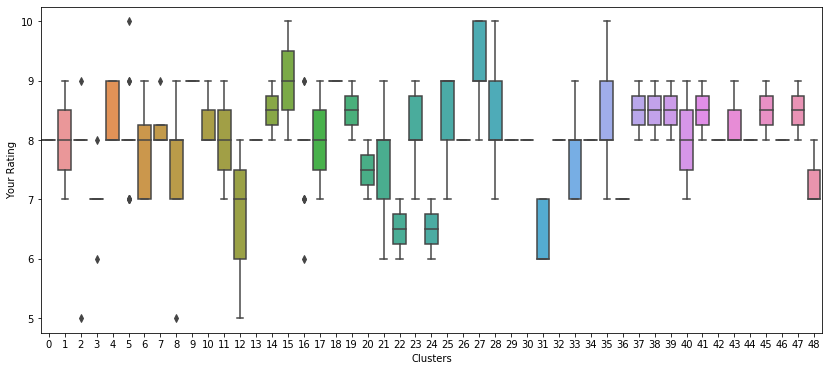

In [395]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Your Rating', data = data_film)

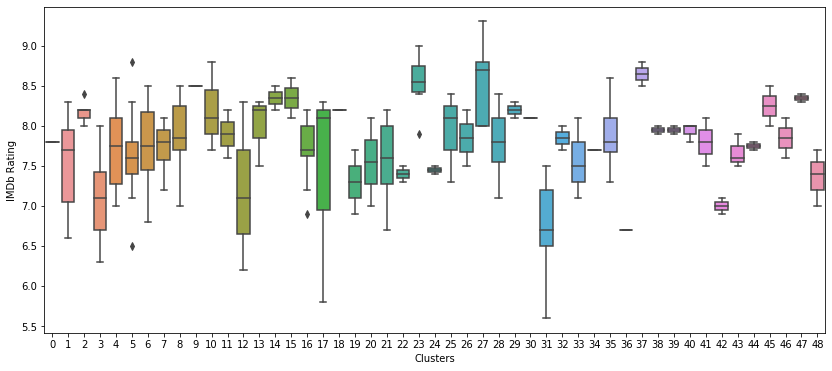

In [396]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'IMDb Rating', data = data_film)

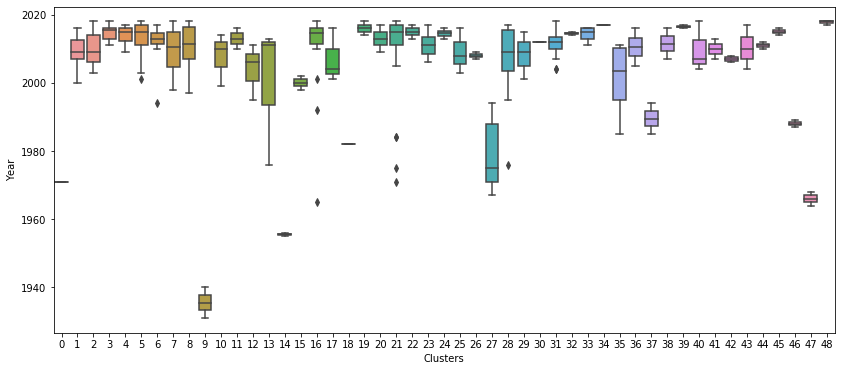

In [397]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Year', data = data_film)

#### Insight: I tend to rate newer movies lower that tend to have higher IMDb scores due to recency bias.

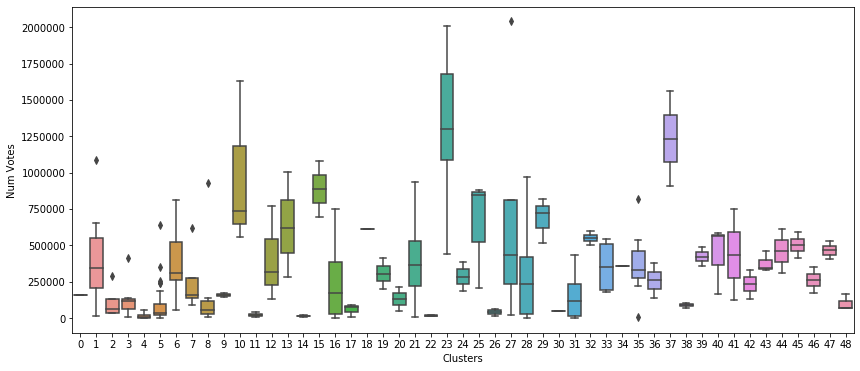

In [398]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Num Votes', data = data_film)